In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Loan Predication CSV dataset file using pandas
df=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\train.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])
df.head()

No of Rows: 614
No. of Columns: 13


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: >

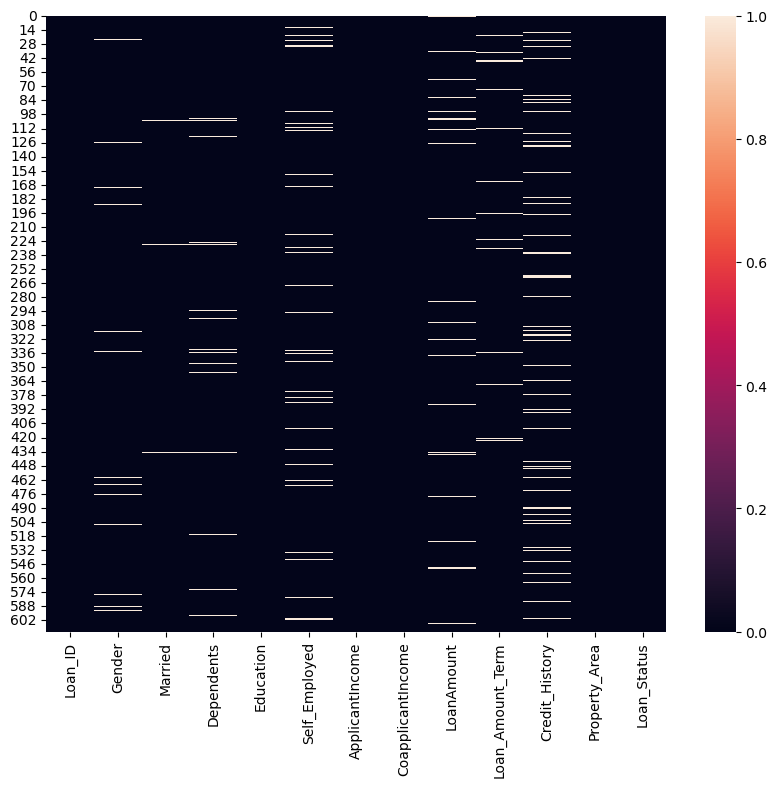

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Credit_History                 50        8.143322
Self_Employed                  32        5.211726
LoanAmount                     22        3.583062
Dependents                     15        2.442997
Loan_Amount_Term               14        2.280130
Gender                         13        2.117264
Married                         3        0.488599
Loan_ID                         0        0.000000
Education                       0        0.000000
ApplicantIncome                 0        0.000000
CoapplicantIncome               0        0.000000
Property_Area                   0        0.000000
Loan_Status                     0        0.000000


In [10]:
category=['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']
for i in category:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Loan_Amount_Term
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
Property_Area
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Credit_History
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64
Loan_Status
Loan_Status
Y    422
N    192
Name: count, dtype: int64


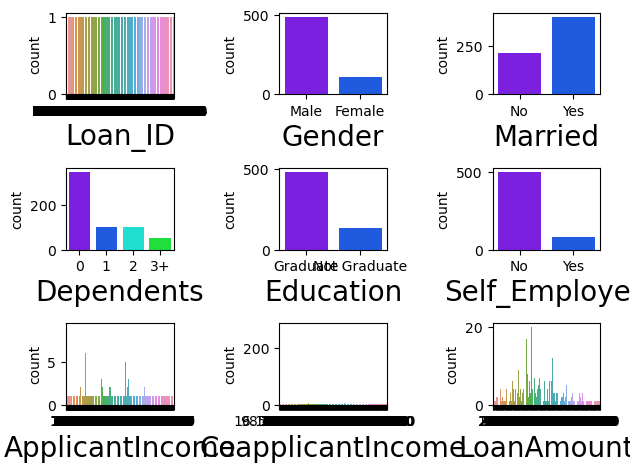

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plotnumber = 1
for i in df.columns:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(data=df, x=i)  
        plt.xlabel(i, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()


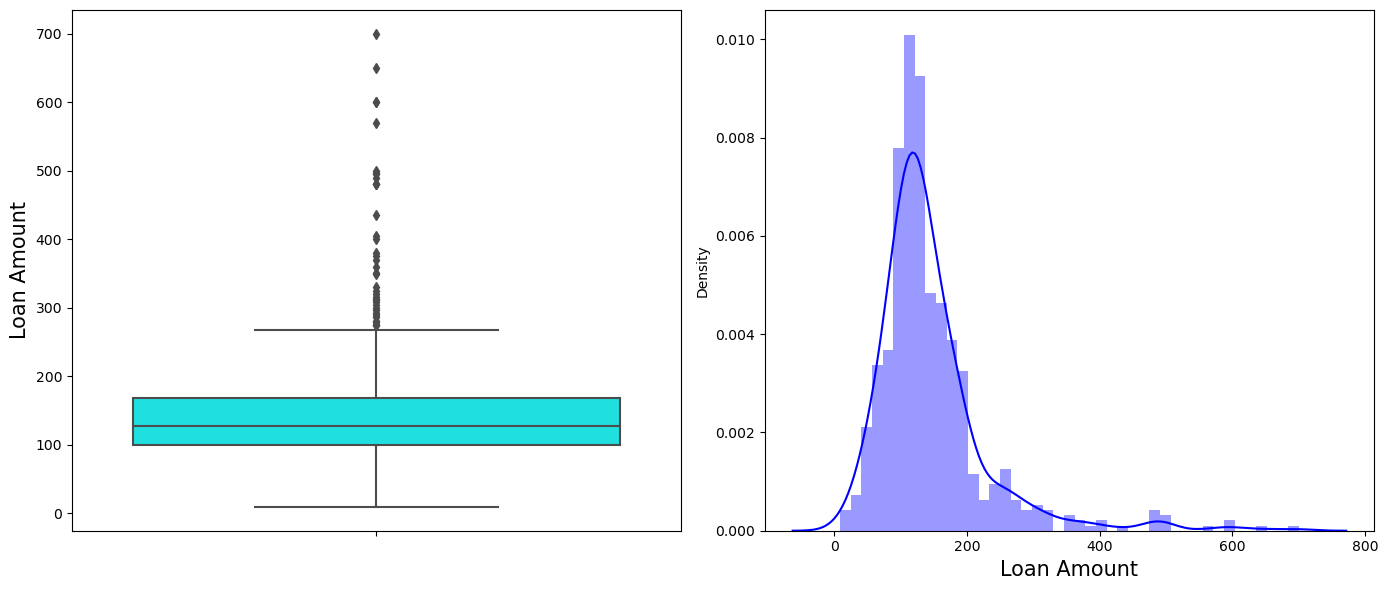

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [16]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


In [17]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [18]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Loan_ID                         0             0.0
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


<Axes: >

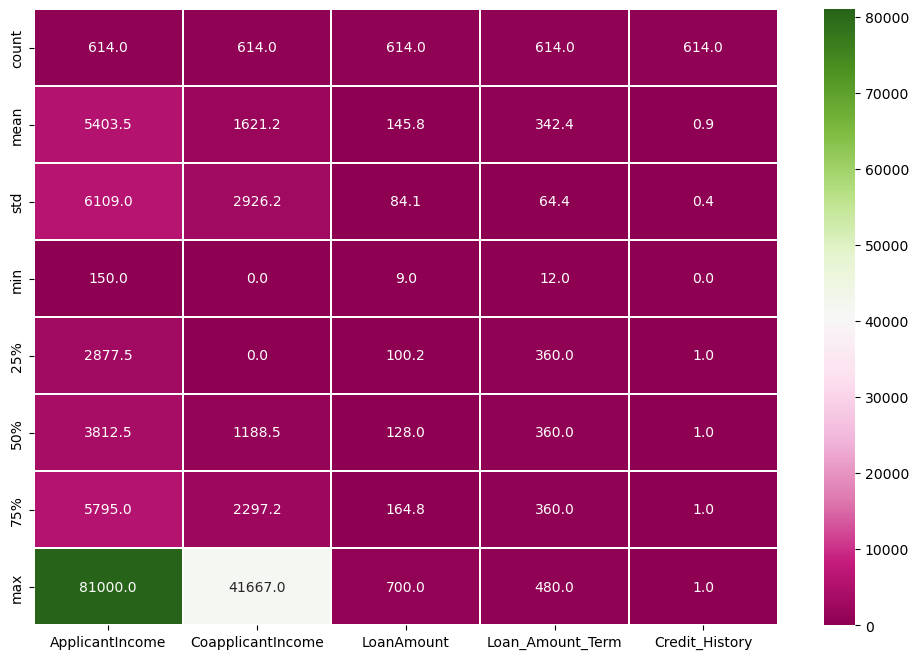

In [19]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


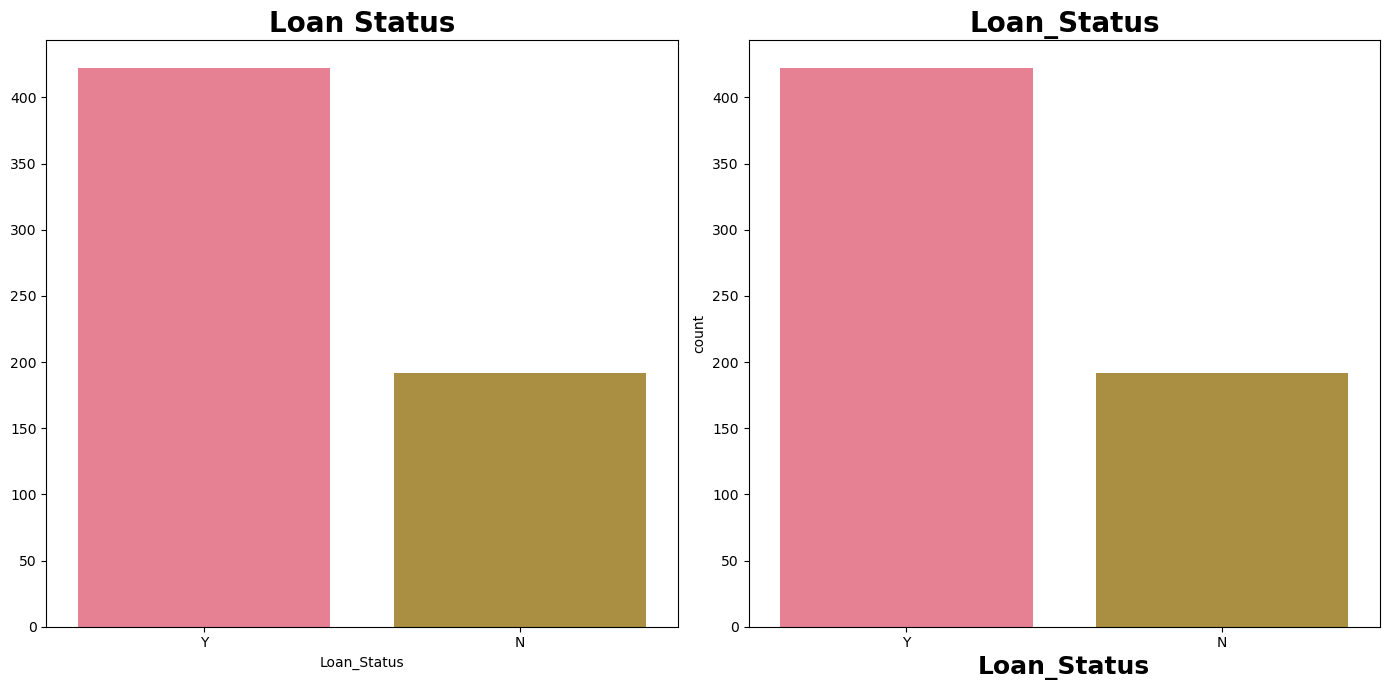

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.countplot(x='Loan_Status', data=df, ax=ax[0])
ax[0].set_title('Loan Status', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

sns.countplot(x='Loan_Status', data=df, ax=ax[1])
ax[1].set_title('Loan_Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Loan_Status", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()


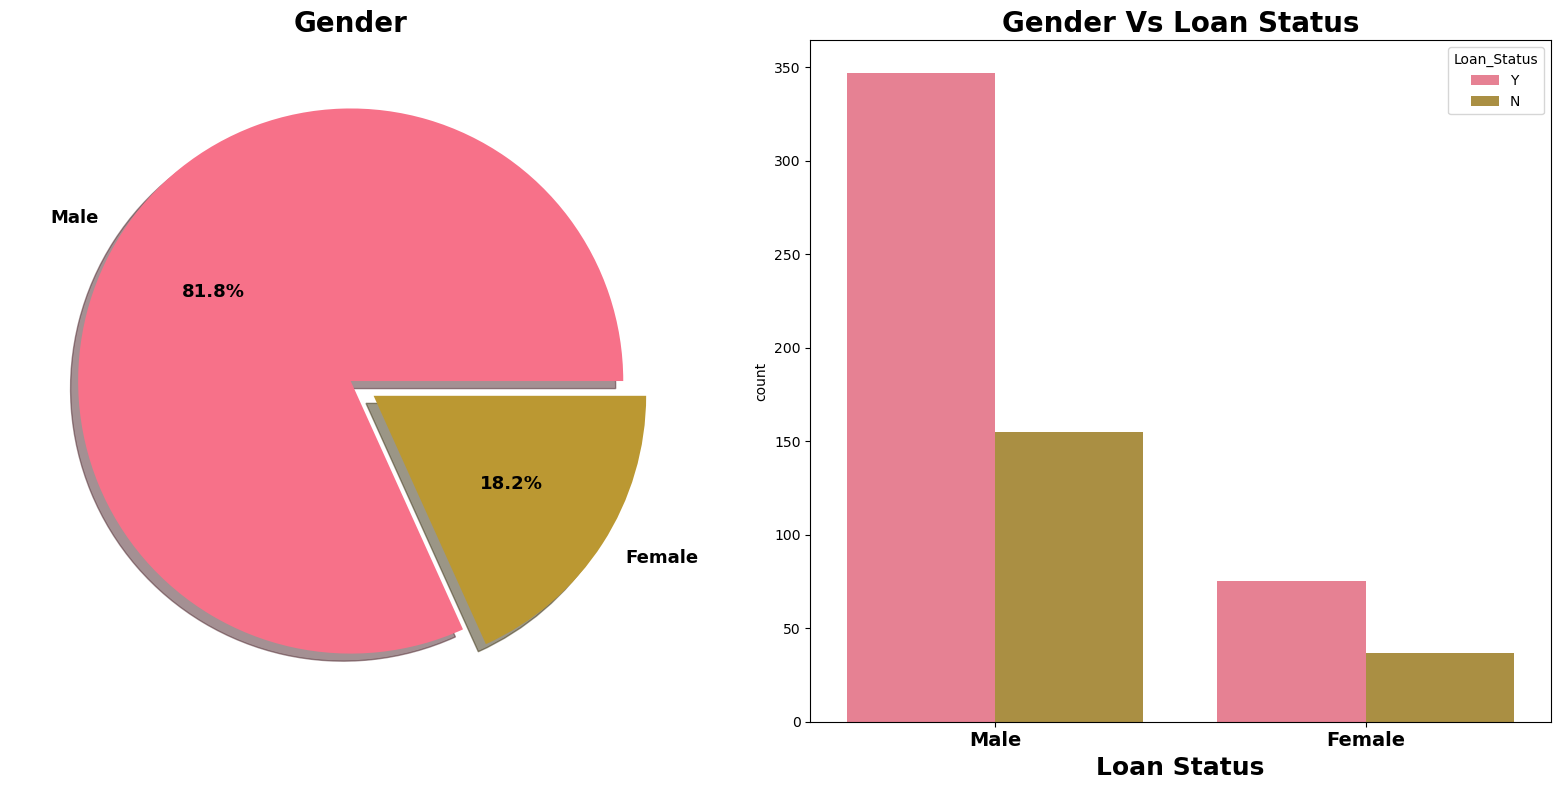

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Gender',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Gender Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Loan Status",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [28]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True).style.background_gradient(cmap='summer_r')

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


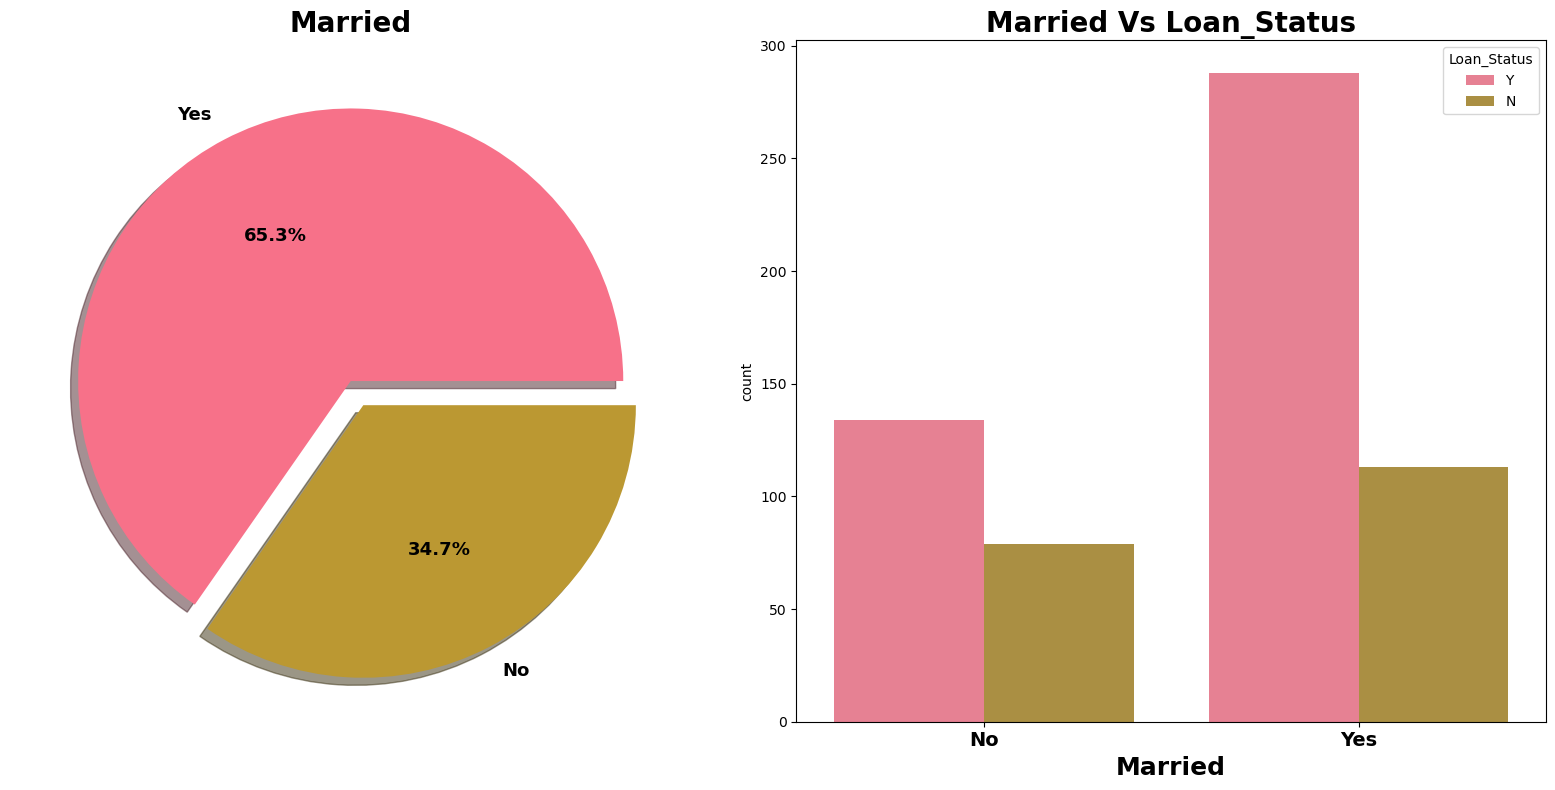

In [35]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
x='Married'
ax[0].set_title('Married', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Married',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Married Vs Loan_Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Married",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [33]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True).style.background_gradient(cmap='gist_rainbow_r')

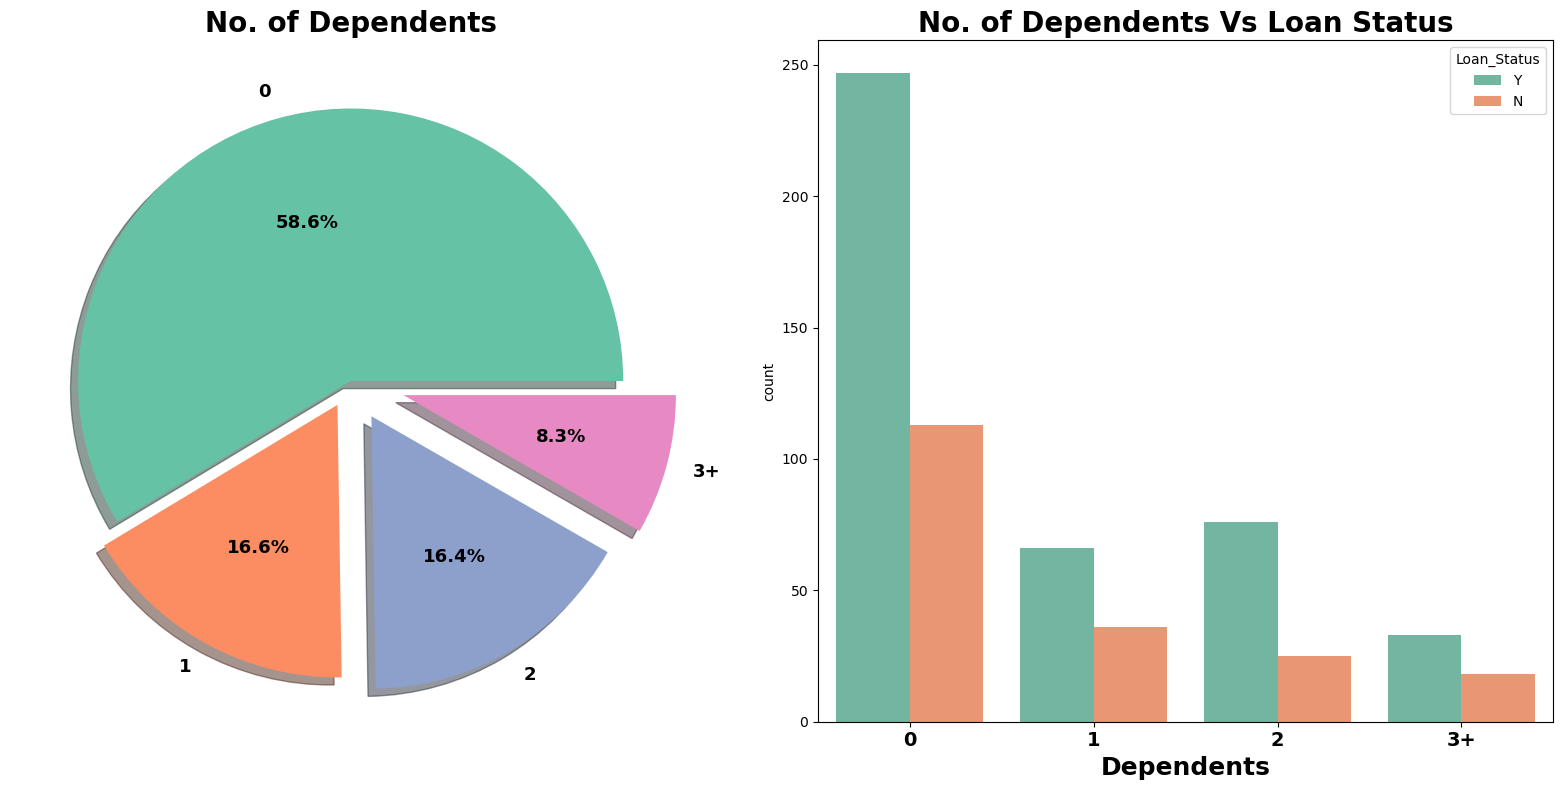

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1,0.15,0.2],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('No. of Dependents', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Dependents',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('No. of Dependents Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [37]:
pd.crosstab([df['Dependents']],[df.Loan_Status,df['Gender']],margins=True).style.background_gradient(cmap='summer_r')

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


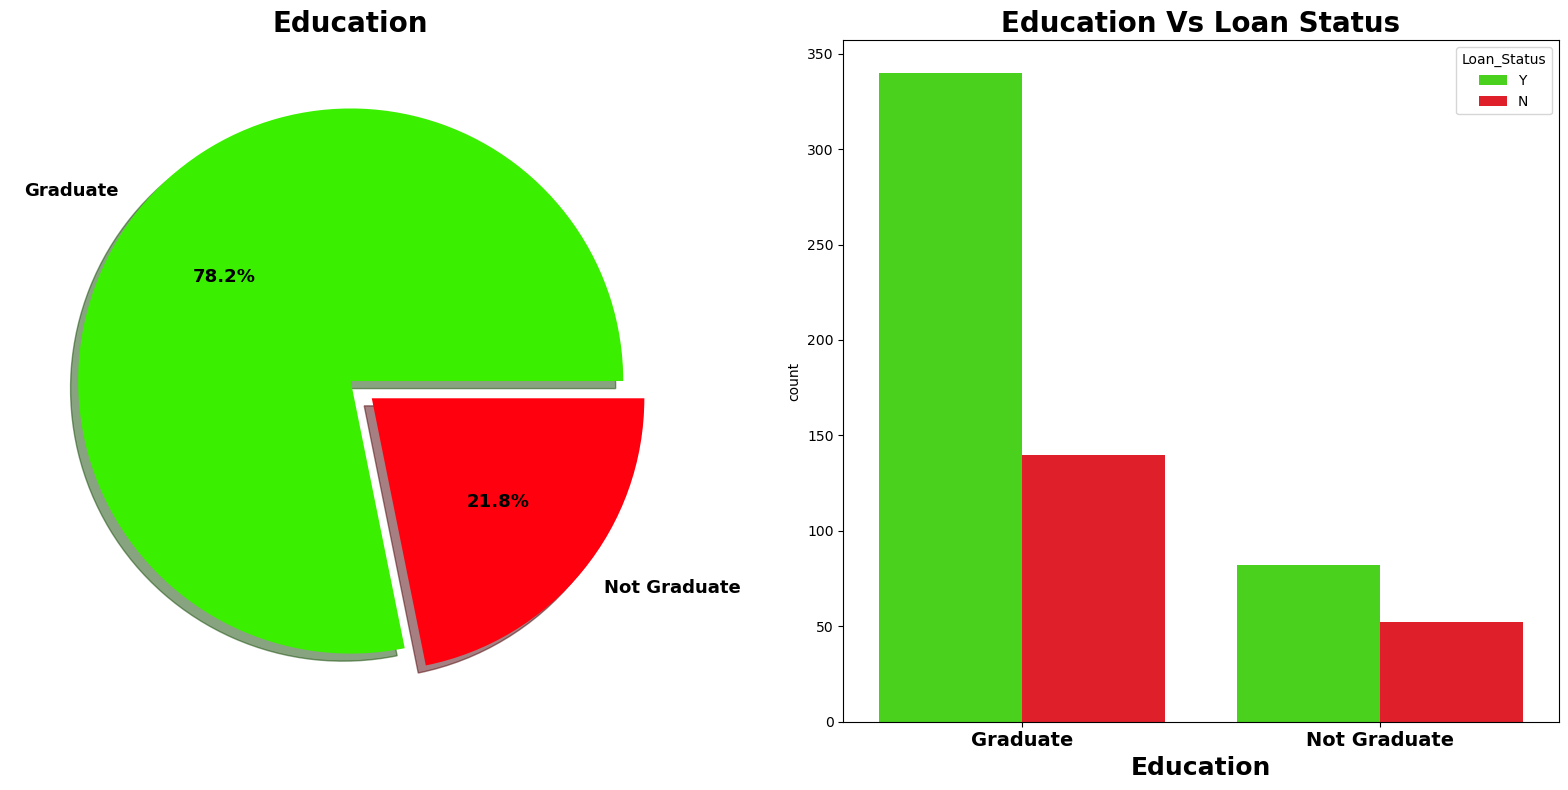

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('prism')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [40]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True).style.background_gradient(cmap='Blues')

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [44]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

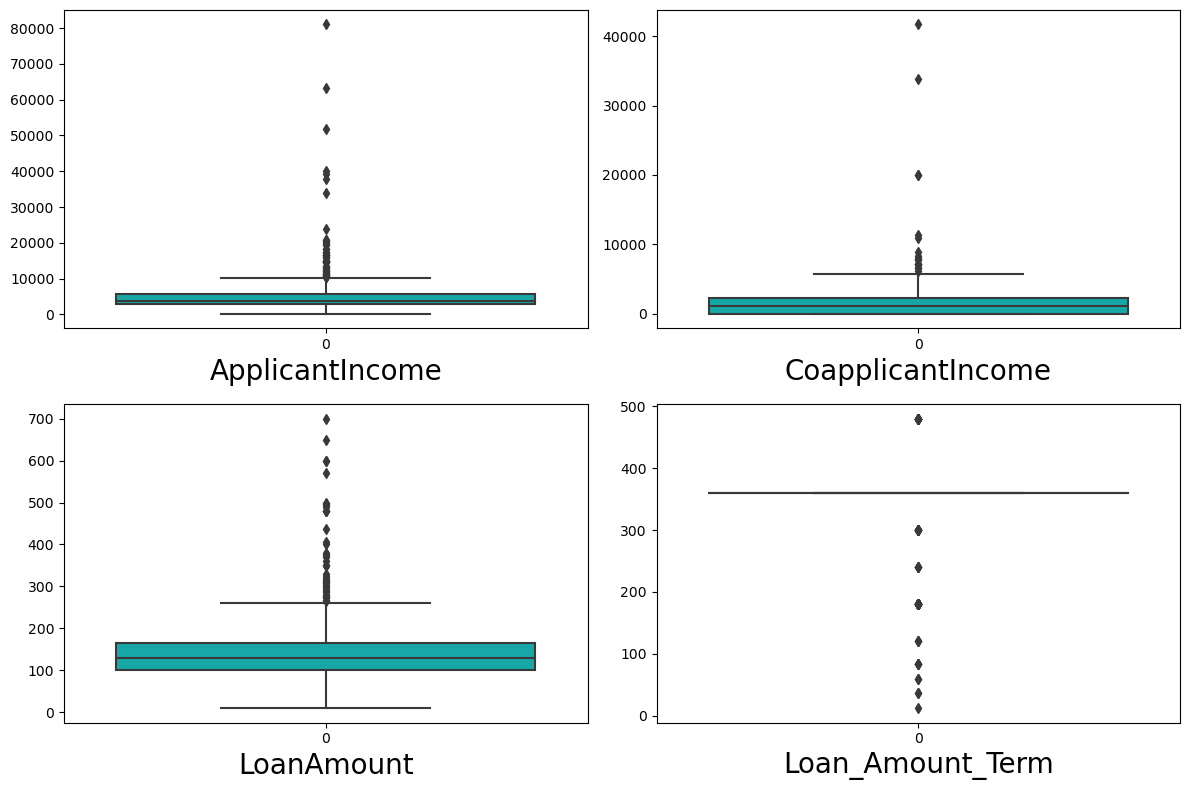

In [45]:
plt.figure(figsize=(12,8),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [46]:
df.drop(["Loan_ID"], axis=1, inplace=True)

In [47]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [48]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [50]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (577, 12)
Shape of the dataframe after removing outliers:  (505, 12)
Percentage of data loss post outlier removal:  12.478336221837088


In [51]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


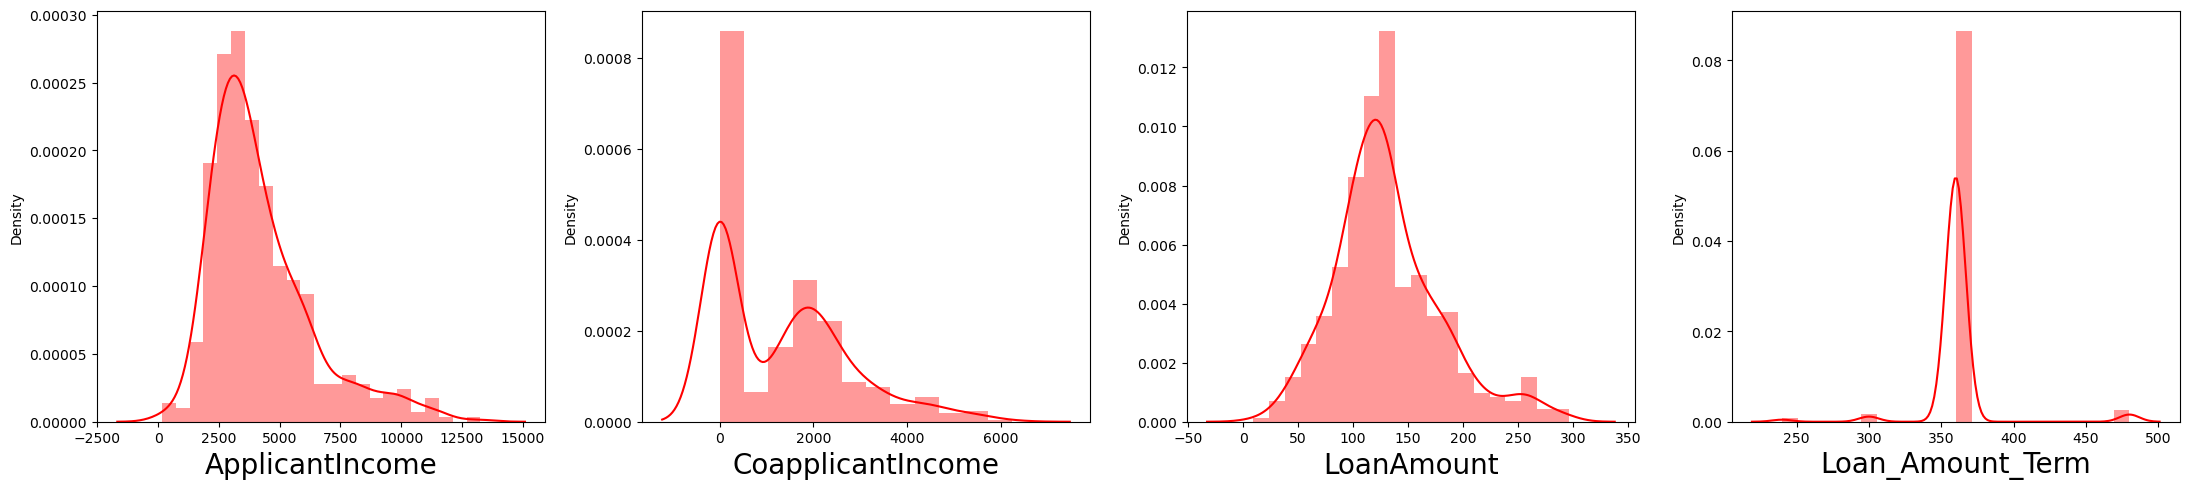

In [52]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col],color='r')
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [53]:
df.skew()

Gender              -1.520076
Married             -0.556501
Dependents           1.092678
Education            1.329581
Self_Employed        2.392823
ApplicantIncome      1.372568
CoapplicantIncome    0.877901
LoanAmount           0.753298
Loan_Amount_Term     1.984347
Credit_History      -2.050643
Property_Area       -0.017177
Loan_Status         -0.839707
dtype: float64

In [54]:
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [55]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.892792,-1.125908,0.029690
1,0.357408,0.761570,0.029690
2,-0.501979,-1.125908,-1.471016
3,-0.785400,0.917534,-0.139435
4,0.950551,-1.125908,0.293637


In [56]:
df.skew()

Gender              -1.520076
Married             -0.556501
Dependents           1.092678
Education            1.329581
Self_Employed        2.392823
ApplicantIncome      0.070275
CoapplicantIncome   -0.203118
LoanAmount           0.050290
Loan_Amount_Term     1.984347
Credit_History      -2.050643
Property_Area       -0.017177
Loan_Status         -0.839707
dtype: float64

In [57]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.375062,0.188002,0.052177,0.010568,0.058662,0.243052,0.165575,-0.037283,0.024765,-0.025641,0.046401
Married,0.375062,1.000000,0.326226,0.023629,0.007854,-0.051609,0.370486,0.214292,-0.074920,0.007332,0.020266,0.082141
Dependents,0.188002,0.326226,1.000000,0.062525,0.076841,0.121896,0.007067,0.139816,-0.039684,-0.036041,-0.003781,0.026784
Education,0.052177,0.023629,0.062525,1.000000,-0.002988,-0.154661,0.062133,-0.121182,0.009000,-0.066440,-0.110784,-0.075376
Self_Employed,0.010568,0.007854,0.076841,-0.002988,1.000000,0.158340,-0.108643,0.099639,-0.079162,0.007262,-0.036366,-0.025276
ApplicantIncome,0.058662,-0.051609,0.121896,-0.154661,0.158340,1.000000,-0.387088,0.457132,-0.090694,0.010321,-0.024855,-0.032192
CoapplicantIncome,0.243052,0.370486,0.007067,0.062133,-0.108643,-0.387088,1.000000,0.172797,0.038219,0.048389,-0.075838,0.136254
LoanAmount,0.165575,0.214292,0.139816,-0.121182,0.099639,0.457132,0.172797,1.000000,-0.008660,-0.005273,-0.100653,-0.007621
Loan_Amount_Term,-0.037283,-0.074920,-0.039684,0.009000,-0.079162,-0.090694,0.038219,-0.008660,1.000000,-0.050297,0.012036,-0.084601
Credit_History,0.024765,0.007332,-0.036041,-0.066440,0.007262,0.010321,0.048389,-0.005273,-0.050297,1.000000,-0.009381,0.563642


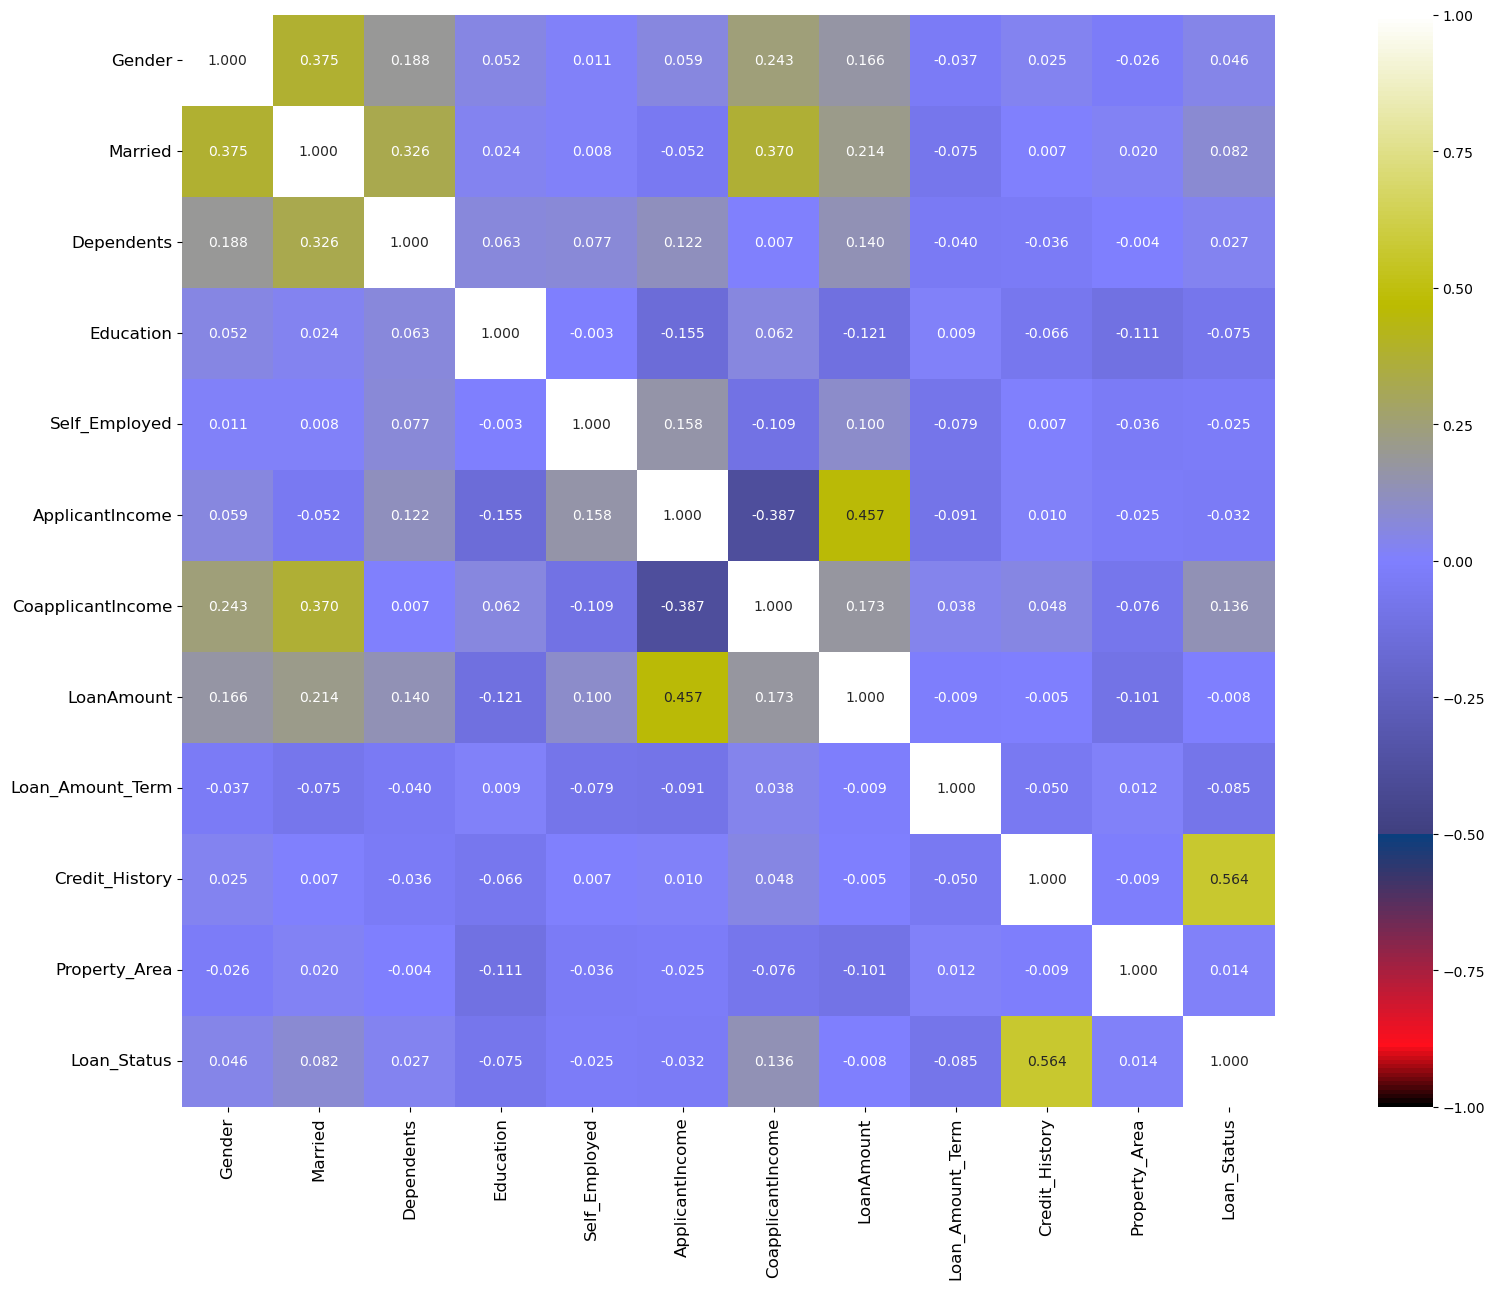

In [58]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

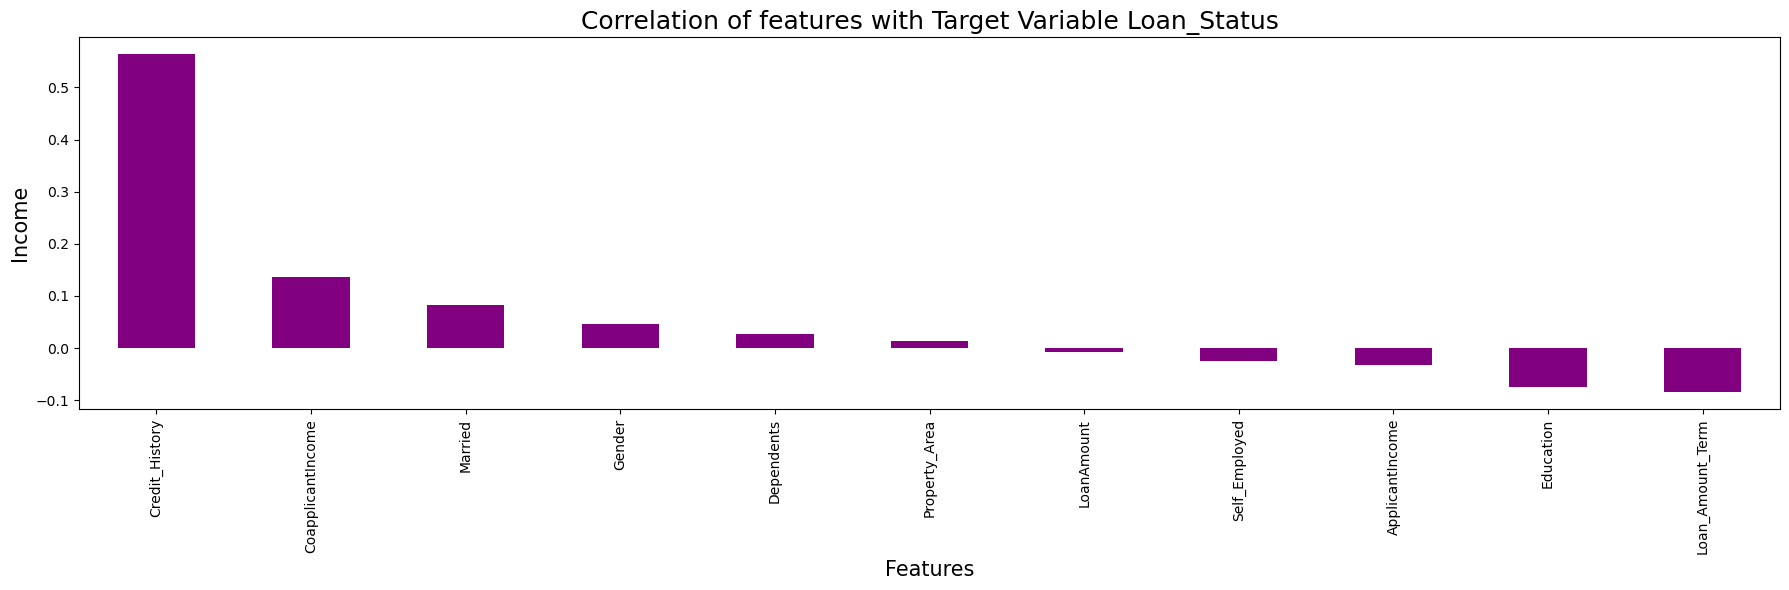

In [59]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Income',fontsize=15)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 18)
plt.show()

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.074127,Gender
1,3.925546,Married
2,1.757078,Dependents
3,1.368604,Education
4,1.172260,Self_Employed
5,1.828225,ApplicantIncome
6,1.680282,CoapplicantIncome
7,1.603260,LoanAmount
8,13.151896,Loan_Amount_Term
9,10.199013,Credit_History


In [61]:
df.Loan_Status.value_counts()

Loan_Status
1    350
0    155
Name: count, dtype: int64

In [64]:
pip install -U scikit-learn


In [65]:
pip install scikit-learn==0.24.2


     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB 222.6 kB/s eta 0:00:34
     ---------------------------------------- 0.0/7.5 MB 220.2 kB/s eta 0:00:35
     ---------------------------------------- 0.0/7.5 MB 220.2 kB/s eta 0:00:35
     ---------------------------------------- 0.0/7.5 MB 220.2 kB/s eta 0:00:35
     ---------------------------------------- 0.0/7.5 MB 220.2 kB/s eta 0:00:35
     ---------------------------------------- 0.1/7.5 MB 255.1 kB/s eta 0:00:30
     ---------------------------------------- 0.1/7.5 MB 255.1 kB/s eta 0:00:30
      --------------------------------------- 0.1/7.5 MB 273.1 kB/s eta 0:00:28
      --------------------------------------- 0.2/7.5 MB 378.3 kB/s eta 0:00:20
      --------------------------------------- 0.2/7.5 MB 361.7 kB/s eta 0:00:21
     - -------------------------------------- 0.2/7.5 MB 4

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [62 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Abhishek\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_pr

In [66]:
pip install -U imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/258.0 kB 186.2 kB/s eta 0:00:02
   --------- ----------------------------- 61.4/258.0 kB 297.7 kB/s eta 0:00:01
   ------------- ------------------------- 92.2/258.0 kB 403.5 kB/s eta 0:00:01
   ------------------ ------------------- 122.9/258.0 kB 423.5 kB/s eta 0:00:01
   ------------------------- ------------ 174.1/258.0 kB 551.6 kB/s eta 0:00:01
   --------------------------------- ---- 225.3/258.0 kB 597.3 kB/s eta 0:00:01
   -------------

In [69]:
pip install imbalanced-learn==0.8.0


Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install scikit-learn==1.0.2 imbalanced-learn==0.8.0


     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/6.7 MB 217.9 kB/s eta 0:00:31
     ---------------------------------------- 0.1/6.7 MB 292.6 kB/s eta 0:00:23
     ---------------------------------------- 0.1/6.7 MB 292.6 kB/s eta 0:00:23
      --------------------------------------- 0.1/6.7 MB 420.8 kB/s eta 0:00:16
      --------------------------------------- 0.1/6.7 MB 413.7 kB/s eta 0:00:16
     - -------------------------------------- 0.2/6.7 MB 593.2 kB/s eta 0:00:11
     - -------------------------------------- 0.2/6.7 MB 593.2 kB/s eta 0:00:11
     - -------------------------------------- 0.3/6.7 MB 752.2 kB/s eta 0:00:09
     - -------------------------------------- 0.3/6.7 MB 752.2 kB/s eta 0:00:09
     -- ------------------------------------- 0.4/6.7 MB 732.8 kB/s

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [66 lines of output]
  Partial import of sklearn during the build process.
  setup.py:128: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.command.build_ext import build_ext  # noqa
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\Users\Abhishek\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\Users\A

In [72]:
from imblearn.over_sampling import SMOTE


In [73]:
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [74]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [75]:
Y.value_counts()

Loan_Status
1    350
0    350
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [78]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (490, 11)
Training target vector size: (490,)
Test feature matrix size: (210, 11)
Test target vector size: (210,)


In [80]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.819047619047619 on Random_state 169


In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7380952380952381


Confusion matrix of Logistics Regression : 
 [[72 37]
 [18 83]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.80      0.66      0.72       109
           1       0.69      0.82      0.75       101

    accuracy                           0.74       210
   macro avg       0.75      0.74      0.74       210
weighted avg       0.75      0.74      0.74       210



In [96]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47809144373375745
RMSE value for k=  2 is: 0.511766315719159
RMSE value for k=  3 is: 0.49280538030458115
RMSE value for k=  4 is: 0.511766315719159
RMSE value for k=  5 is: 0.5209880722517277
RMSE value for k=  6 is: 0.5255382728122436
RMSE value for k=  7 is: 0.5023753102820165
RMSE value for k=  8 is: 0.5255382728122436
RMSE value for k=  9 is: 0.5209880722517277
RMSE value for k=  10 is: 0.5300494136893097
RMSE value for k=  11 is: 0.4976133515281193
RMSE value for k=  12 is: 0.50709255283711
RMSE value for k=  13 is: 0.49280538030458115
RMSE value for k=  14 is: 0.4680252333449758
RMSE value for k=  15 is: 0.4879500364742666
RMSE value for k=  16 is: 0.47809144373375745
RMSE value for k=  17 is: 0.49280538030458115
RMSE value for k=  18 is: 0.48304589153964794
RMSE value for k=  19 is: 0.5163977794943222
RMSE value for k=  20 is: 0.5163977794943222
RMSE value for k=  21 is: 0.48304589153964794
RMSE value for k=  22 is: 0.48304589153964794
RMSE value for 

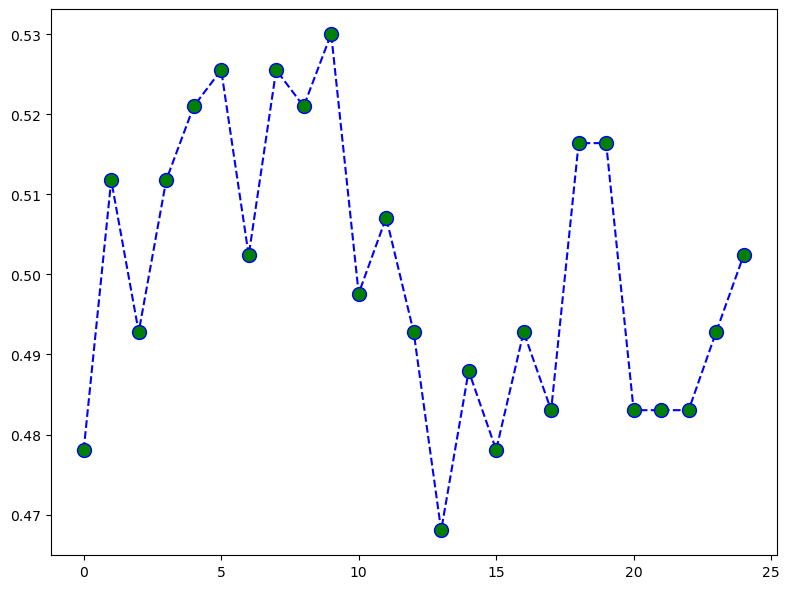

In [83]:
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [85]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [90]:
conda update scikit-learn


Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.5.0




In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

models = [ 
    SVC(probability=True),
    GaussianNB(),
    LogisticRegression(),
    RandomForestClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    plot_roc_curve(model, X_test, y_test)
    plt.show()


NameError: name 'y_train' is not defined

In [7]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('============================================================================================================')


TypeError: float() argument must be a string or a real number, not 'ellipsis'

In [100]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.67142857 0.7        0.72857143 0.74285714 0.80714286]
Mean Score : 0.7300000000000001
Std deviation : 0.04571428571428574




Cross Validation Score SVC() :

Score : [0.64285714 0.72142857 0.68571429 0.72142857 0.77857143]
Mean Score : 0.71
Std deviation : 0.04485805276602165




Cross Validation Score GaussianNB() :

Score : [0.64285714 0.74285714 0.73571429 0.76428571 0.76428571]
Mean Score : 0.73
Std deviation : 0.0450396650583841




Cross Validation Score DecisionTreeClassifier() :

Score : [0.65       0.70714286 0.75       0.67857143 0.77142857]
Mean Score : 0.7114285714285714
Std deviation : 0.04462999814803802




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.72857143 0.75714286 0.67857143 0.73571429 0.77142857]
Mean Score : 0.7342857142857143
Std deviation : 0.031751586815561235




Cross Validation Score RandomForestClassifier() :

Score : [0.71428571 0.76428571 0.8        0.79285714 0.8857

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [103]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5; 1/16

[CV 1/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.735 total time=   0.0s
[CV 2/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 2/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.735 total time=   0.0s
[CV 3/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.827 total time=   0.0s
[CV 4/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 9/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 5/5; 9/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 9/168] END bootstrap=True, criterion=gini, max_dept

[CV 1/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 2/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 3/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 4/5; 16/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5; 16/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=10
[CV 5/5; 16/168] END bootstrap=True, criterion=gini,

[CV 2/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.735 total time=   0.0s
[CV 3/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 3/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.776 total time=   0.0s
[CV 4/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 4/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 5/5; 23/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10
[CV 5/5; 23/168] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.765 total time=   0.0s
[CV 1/5; 24/168] START bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=15
[CV 1/5; 24/168] END bootstrap=True, criteri

[CV 4/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.755 total time=   0.0s
[CV 5/5; 36/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5
[CV 5/5; 36/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=5;, score=0.755 total time=   0.0s
[CV 1/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 1/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.765 total time=   0.0s
[CV 2/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 2/5; 37/168] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10;, score=0.673 total time=   0.0s
[CV 3/5; 37/168] START bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 37/168] END bootstrap=True, criterion=

[CV 1/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.786 total time=   0.0s
[CV 2/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 2/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.694 total time=   0.0s
[CV 3/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 3/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.796 total time=   0.0s
[CV 4/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 4/5; 50/168] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5;, score=0.796 total time=   0.0s
[CV 5/5; 50/168] START bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=5
[CV 5/5; 50/168] END bootstrap=True, criterion=gini,

[CV 2/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.735 total time=   0.0s
[CV 3/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 3/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.765 total time=   0.0s
[CV 4/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 4/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.765 total time=   0.0s
[CV 5/5; 64/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5
[CV 5/5; 64/168] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=5;, score=0.765 total time=   0.0s
[CV 1/5; 65/168] START bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=10
[CV 1/5; 65/168] END bootstrap=True, criterion=gini

[CV 5/5; 78/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=5;, score=0.806 total time=   0.0s
[CV 1/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 1/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.796 total time=   0.0s
[CV 2/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 2/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.704 total time=   0.0s
[CV 3/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 3/5; 79/168] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.735 total time=   0.0s
[CV 4/5; 79/168] START bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 79/168] END bootstrap=True, criterio

[CV 2/5; 93/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 3/5; 93/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 3/5; 93/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.816 total time=   0.0s
[CV 4/5; 93/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 4/5; 93/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.714 total time=   0.0s
[CV 5/5; 93/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10
[CV 5/5; 93/168] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.745 total time=   0.0s
[CV 1/5; 94/168] START bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15
[CV 1/5; 94/168] END bootstr

[CV 3/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 4/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 4/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 5/5; 103/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50
[CV 5/5; 103/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=50;, score=nan total time=   0.0s
[CV 1/5; 104/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60
[CV 1/5; 104/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60;, score=nan total time=   0.0s
[CV 2/5; 104/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=auto, n_estimators=60
[CV 2/5; 104/168] EN

[CV 2/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.755 total time=   0.0s
[CV 3/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 3/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.847 total time=   0.0s
[CV 4/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 4/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.816 total time=   0.0s
[CV 5/5; 110/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50
[CV 5/5; 110/168] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=50;, score=0.796 total time=   0.0s
[CV 1/5; 111/168] START bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=60
[CV 1/5; 111

[CV 2/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.745 total time=   0.0s
[CV 3/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 3/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.796 total time=   0.0s
[CV 4/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 4/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.786 total time=   0.0s
[CV 5/5; 121/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10
[CV 5/5; 121/168] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.735 total time=   0.0s
[CV 1/5; 122/168] START bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15
[CV 1/5; 122

[CV 4/5; 134/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.806 total time=   0.0s
[CV 5/5; 134/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=5
[CV 5/5; 134/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=5;, score=0.765 total time=   0.0s
[CV 1/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 1/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.765 total time=   0.0s
[CV 2/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 2/5; 135/168] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.724 total time=   0.0s
[CV 3/5; 135/168] START bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10
[CV 3/5; 135/16

[CV 1/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 2/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 2/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 3/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 3/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 4/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 4/5; 149/168] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.714 total time=   0.0s
[CV 5/5; 149/168] START bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10
[CV 5/5; 149

[CV 5/5; 162/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=5;, score=0.694 total time=   0.0s
[CV 1/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 1/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.745 total time=   0.0s
[CV 2/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 2/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.735 total time=   0.0s
[CV 3/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 3/5; 163/168] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.837 total time=   0.0s
[CV 4/5; 163/168] START bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10
[CV 4/5; 163/

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [104]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 25}

In [105]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [106]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Abhishek\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [107]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']